## Задание 1

Исходная размерность:		(404, 13)
Сокращенная размерность:	(404, 2)


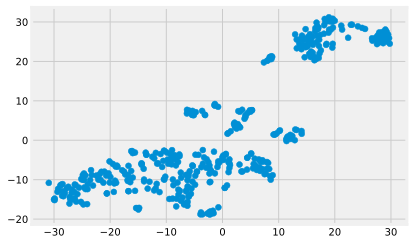

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_boston

# загрузить данные
warnings.filterwarnings("ignore")
boston = load_boston()
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

# разбить и масштабировать
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# tsne модель
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'Исходная размерность:\t\t{X_train_scaled.shape}')
print(f'Сокращенная размерность:\t{X_train_tsne.shape}')

# tsne визуализация
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

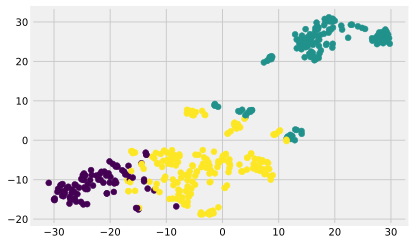

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [3]:
for x in set(labels_train):
    print(f"По кластеру {x} средняя цена {y_train[labels_train == x].price.mean()}\
 уровень приступности {X_train[labels_train == x].CRIM.mean()}")

По кластеру 0 средняя цена 27.788372093023252 уровень приступности 0.07356558139534886
По кластеру 1 средняя цена 16.165354330708666 уровень приступности 10.797028425196853
По кластеру 2 средняя цена 24.958115183246072 уровень приступности 0.42166020942408367


## Задание 3

In [4]:
labels_test = kmeans.predict(X_test_scaled)
for x in set(labels_test):
    print(f"По кластеру {x} средняя цена {y_test[labels_test == x].price.mean()}\
 уровень приступности {X_test[labels_test == x].CRIM.mean()}")

По кластеру 0 средняя цена 31.35 уровень приступности 0.062060000000000004
По кластеру 1 средняя цена 16.437142857142856 уровень приступности 10.165531142857143
По кластеру 2 средняя цена 21.860784313725492 уровень приступности 0.26607882352941176
